# Simulación

## Modelo A
### Paso 1

Ecuaciones empleadas:
$$\frac{\mu}{\rho} = \sigma\frac{N_A}{w} = \sigma n$$

$$\mu = \frac{\mu}{\rho}\rho$$
$\frac{\mu}{\rho}$ es un valor conocido tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

In [34]:
# Simulación de una particula que entra a un detector de NaI de 3x3x3 in^3
import numpy as np
import matplotlib.pyplot as plt

# Datos del detector
t = 3 # in Longitud del detector
t = t*2.54 # cm

# Datos del NaI tomados de 
Z_Na = 11 # Numero atomico del Na
Z_I = 53 # Numero atomico del I
rho = 3.7 # g/cm^3 Densidad del NaI
N_A = 6.022e23 # Numero de Avogadro
w = 150 # g/mol Peso molecular del NaI

r_e = 2.81794e-13 # cm Radio clasico del electron
m_e = 511 # keV Masa del electron

n = (rho*N_A)/w # Numero de atomos por cm^3

E = 662; # keV

# Coeficiente masico de atenuacion g^-1 cm^2 para NaI a 662 keV con dispersión coherente
mu_rho = 7.662e-2 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

mu = mu_rho*rho # Coeficiente de atenuacion cm^-1

# Variables aleatorias
v_int = 0; # interaccion
v_no_int = 0; # no interaccion



# frecuencia P

p_int = 1-np.exp(-mu*t)
p_no_int = np.exp(-mu*t)

pdf = np.array([p_no_int,p_int])
cdf = np.cumsum(pdf)

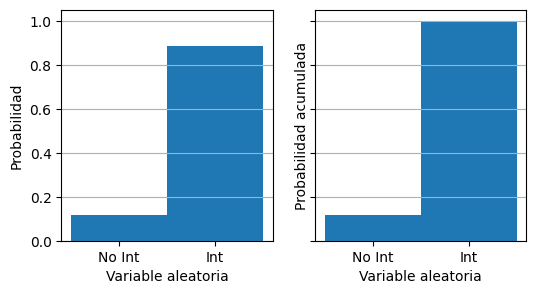

In [35]:
# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada
fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5], pdf, width=1, align='center')
axs[0].set_xticks([0.5, 1.5])
axs[0].set_xticklabels(['No Int', 'Int'])
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Variable aleatoria')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5], cdf, width=1, align='center')
axs[1].set_xticks([0.5, 1.5])
axs[1].set_xticklabels(['No Int', 'Int'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Variable aleatoria')
axs[1].grid(axis='y')

plt.show()


### Paso 2

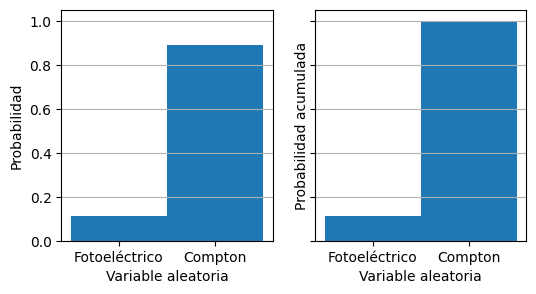

In [36]:
# Absorcion fotoelectrica g^-1 cm^2 para NaI a 662 keV
mu_f_rho = 8.544e-3 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand 
mu_f = mu_f_rho*rho # Coeficiente de atenuacion cm^-1
mu_c = mu - mu_f # Coeficiente de atenuacion cm^-1

p_f = mu_f/mu # Probabilidad de absorcion fotoelectrica
p_c = mu_c/mu # Probabilidad de absorcion compton

pdf1 = np.array([p_f,p_c])
cdf1 = np.cumsum(pdf1)

# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada

fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5], pdf1, width=1, align='center')
axs[0].set_xticks([0.5, 1.5])
axs[0].set_xticklabels(['Fotoeléctrico', 'Compton'])
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Variable aleatoria')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5], cdf1, width=1, align='center')
axs[1].set_xticks([0.5, 1.5])
axs[1].set_xticklabels(['Fotoeléctrico', 'Compton'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Variable aleatoria')
axs[1].grid(axis='y')

plt.show()




### Paso 3
En la ejecución de simulación
### Paso 4

$$\epsilon_e = \frac{E_e}{E_{\gamma}}$$
$$\epsilon_{\gamma} = \frac{E_{\gamma}}{m_e c^2}$$

$$E_e = E_{\gamma}\frac{\epsilon_\gamma(1-\cos\theta)}{1+\epsilon_\gamma(1-\cos\theta)}$$

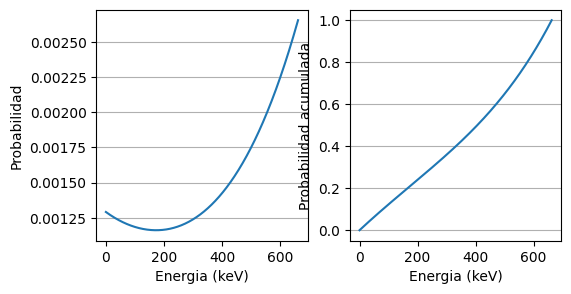

In [48]:
canal = np.arange(0, E+1, 1) # Canal del espectro
a_1 = 1 # keV/Canal
a_0 = 0 # keV
energia = a_1*canal + a_0 # keV
theta = np.arange(0, np.pi, np.pi/(E+1)) # Angulo de dispersion

e_g = E/511 # Energia de la particula en unidades de masa electronica
cte = e_g*(1-np.cos(theta))
e_e = cte/(1+cte) # Energia de la particula despues de la dispersion
e_e = energia/E # Energia de la particula despues de la dispersion

# Funcion de distribucion de probabilidad de la energia de la particula despues de la dispersion

dsdE = np.pi*r_e**2/(m_e*e_g**2)*(2+((e_e**2)/(e_g**2/(1+e_e)**2))+e_e/(1+e_e)*(e_e-2/e_g))
pdf2 = dsdE/np.sum(dsdE)

# Funcion de distribucion acumulada de la energia de la particula despues de la dispersion

cdf2 = np.cumsum(pdf2)

# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada

fig, axs = plt.subplots(1, 2, figsize=(6,3))

axs[0].plot(energia, pdf2)
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energia, cdf2)
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

plt.show()



